In [12]:
##Linear Regression Model

In [11]:
# Step 1
# import the libraries and dataset eg:pandas

# Step 2
# preprocessing and modeling
# a) train_test_split
# b) labelEncoder
# c) standardscaler: scales features for better model performance
# d) counterVectorizer: connects text data into numeric vectors
# e) metrics: offers tools for eveluating model accuracy

# Advanced modelling
# xgboost: a high performance gradient boosting algo used for predictions

# Utility
# warnings.filterwarning("ignore"): hides unnecessary warning messages for clear output

#the main aim is to develop a machine learning model using linear regression accurately to predict the box office of the movies based on the various available features
#the model will be trained on a dataset contained on the dataset

#specific objectives:
#1. Build a predictive model that can estimate the expected revenue of the movie
#2. provide insights into the factors that influence the box office success
#3. compare linear regression performance with other advanced models

In [1]:
import numpy as np  #type:ignore
import pandas as pd #type:ignore
import matplotlib.pyplot as plt  #type:ignore
import seaborn as sns  #type:ignore
from sklearn.model_selection import train_test_split  #type:ignore
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder #type:ignore
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LinearRegression #type:ignore
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #type:ignore
from xgboost import XGBRegressor  #type:ignore
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')


In [2]:
#import the csv file
df = pd.read_csv('Walmart_Sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
#convert the date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
df.isnull().sum()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


<Axes: >

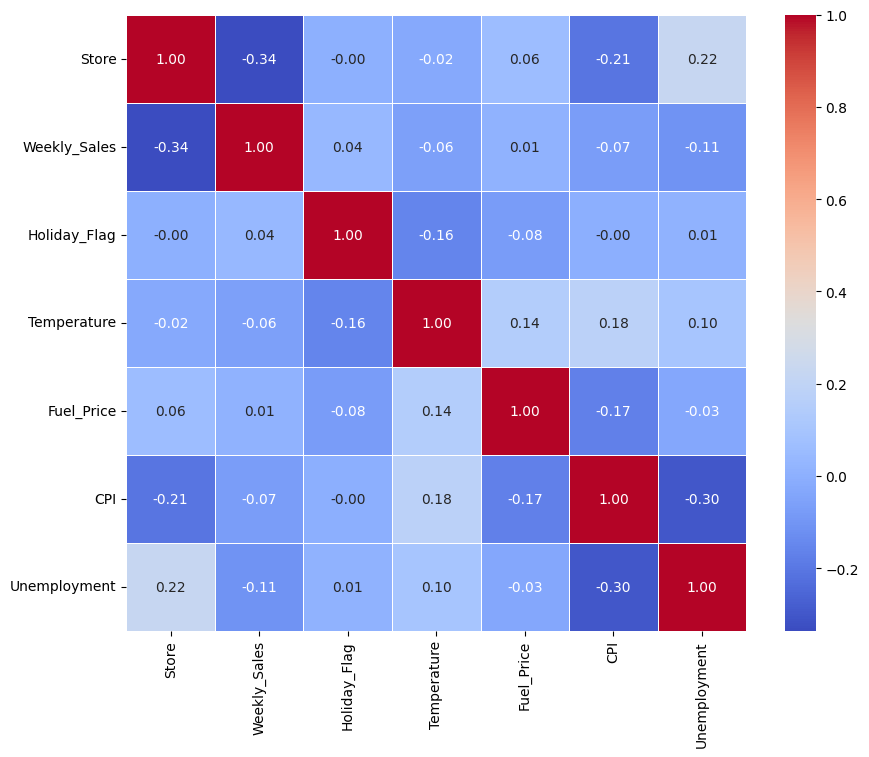

In [108]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [5]:
df.drop("Date", axis=1, inplace=True)
df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106


In [18]:
# Get the features and target variable
X = pd.get_dummies(df.drop('Weekly_Sales', axis=1), drop_first=True)
y = df['Weekly_Sales']

df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (5148, 6)
y_train shape: (5148,)


In [10]:
#normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred = model.predict(X_test)

In [14]:
#add the metrics 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R2 Score:", r2) 
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.148063534059508
Mean Absolute Error: 433274.8811147915
Mean Squared Error: 274455221280.6605
Root Mean Squared Error: 523884.7404541007


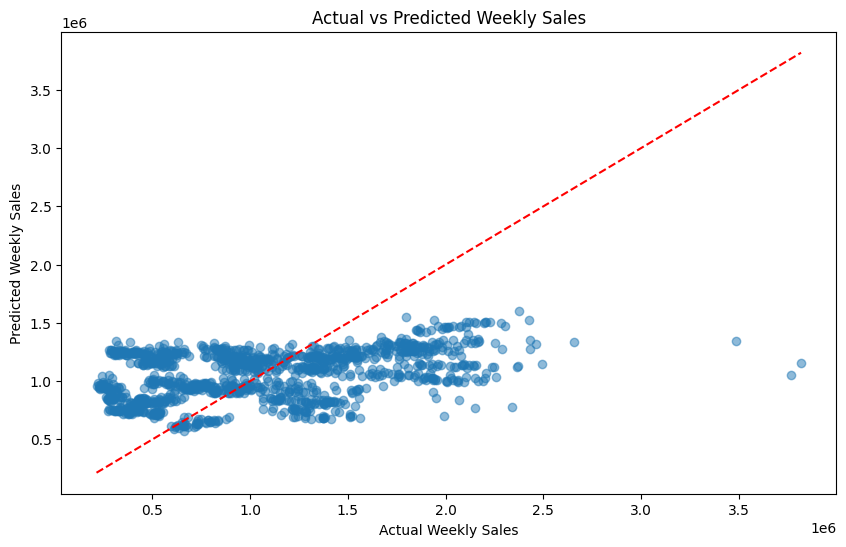

In [15]:
#plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.show()

In [130]:
# length of membership vs yearly amount spent
sns.lmplot(x='Stores', 
           y='Weekly_Sales', 
           data=df,
           scatter_kws={'alpha':0.3})

KeyError: "['Stores'] not in index"